In [214]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random

In [215]:
import torch.fft as fft
import torch

In [216]:
with open('train_data.pkl', 'rb') as file:
    train_data = pickle.load(file)

In [217]:
random_numbers_0 = [random.randint(0, 994) for _ in range(10)]
random_numbers_1 = [random.randint(0, 994) for _ in range(10)]

In [218]:
data_points_0 = [train_data[i][0] for i in random_numbers_0]
data_points_1 = [train_data[i][1] for i in random_numbers_1]

data_points = data_points_0 + data_points_1

In [219]:
data_points = [data_point.reshape(300, 55, 3) for data_point in data_points]

In [220]:
# List of joint names
joint_names = [
    'pelvis', 'left_hip', 'right_hip', 'spine1', 'left_knee', 'right_knee',
    'spine2', 'left_ankle', 'right_ankle', 'spine3', 'left_foot', 'right_foot',
    'neck', 'left_collar', 'right_collar', 'head', 'left_shoulder',
    'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist',
    'jaw', 'left_eye_smplhf', 'right_eye_smplhf', 'left_index1', 'left_index2',
    'left_index3', 'left_middle1', 'left_middle2', 'left_middle3',
    'left_pinky1', 'left_pinky2', 'left_pinky3', 'left_ring1', 'left_ring2',
    'left_ring3', 'left_thumb1', 'left_thumb2', 'left_thumb3', 'right_index1',
    'right_index2', 'right_index3', 'right_middle1', 'right_middle2',
    'right_middle3', 'right_pinky1', 'right_pinky2', 'right_pinky3',
    'right_ring1', 'right_ring2', 'right_ring3', 'right_thumb1',
    'right_thumb2', 'right_thumb3'
]

## Left Wrist

In [221]:
s_f = 0.02

In [222]:
index = joint_names.index('left_wrist')

In [223]:
data = [data_point[:, index,0] for data_point in data_points]

In [224]:
def plot_freq_spectrum(data_point, str):
    '''data_point [300 1]'''
    data_point = torch.from_numpy(data_point)
    fft_result = fft.rfft(data_point, norm='forward')
    amplitude = torch.abs(fft_result)
    freqs = fft.rfftfreq(len(data_point), s_f)
    plt.plot(freqs, amplitude)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Amplitude vs. Frequency'+str)
    plt.grid()
    plt.show()

In [225]:
def plot_freq_spectrum_update(data_point, str):
    '''data_point [300, 1]'''
    data_point = torch.from_numpy(data_point)

    fft_result = fft.rfft(data_point, norm='forward')
    amplitude = torch.abs(fft_result)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    ax1.plot(data_point.squeeze())
    ax1.set_title('Time Domain Signal '+str)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('x-coordinate')
    
    ax2.plot(amplitude)
    ax2.set_title('Frequency Domain Signal')
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Amplitude '+str)

    plt.title(str)
    plt.grid()
    plt.show()

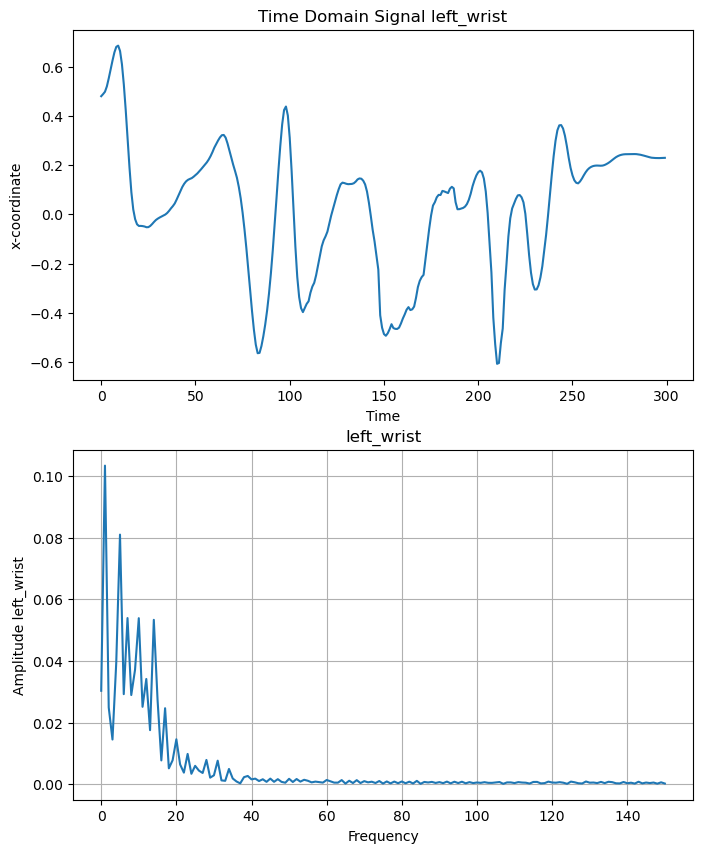

In [226]:
plot_freq_spectrum_update(data[9], 'left_wrist')

## Right Wrist

In [227]:
index = joint_names.index('right_wrist')

In [228]:
data = [data_point[:, index,0] for data_point in data_points]

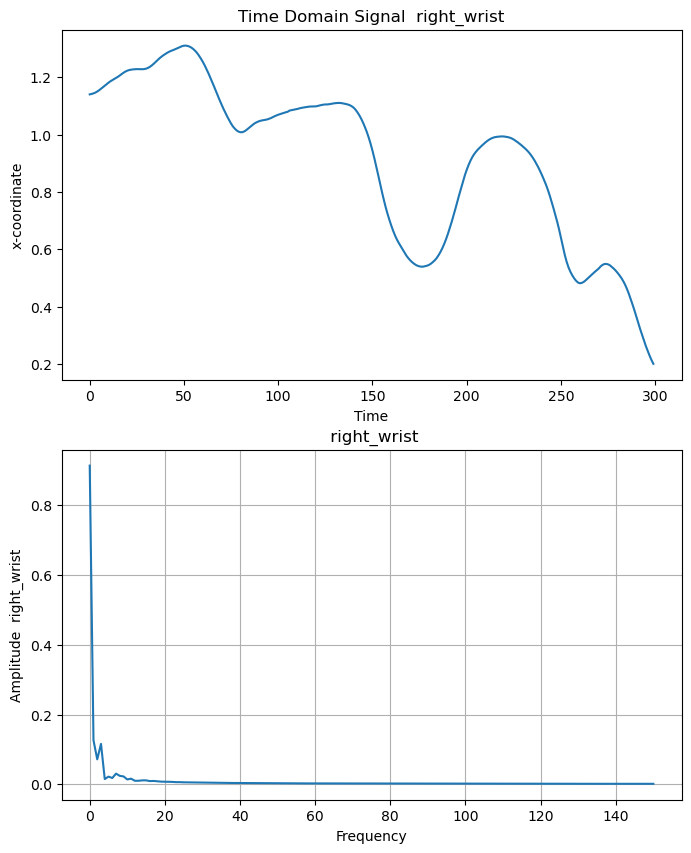

In [229]:
plot_freq_spectrum_update(data[-3], ' right_wrist')

## Left Foot

In [230]:
index = joint_names.index('left_foot')

In [231]:
data = [data_point[:, index,0] for data_point in data_points]

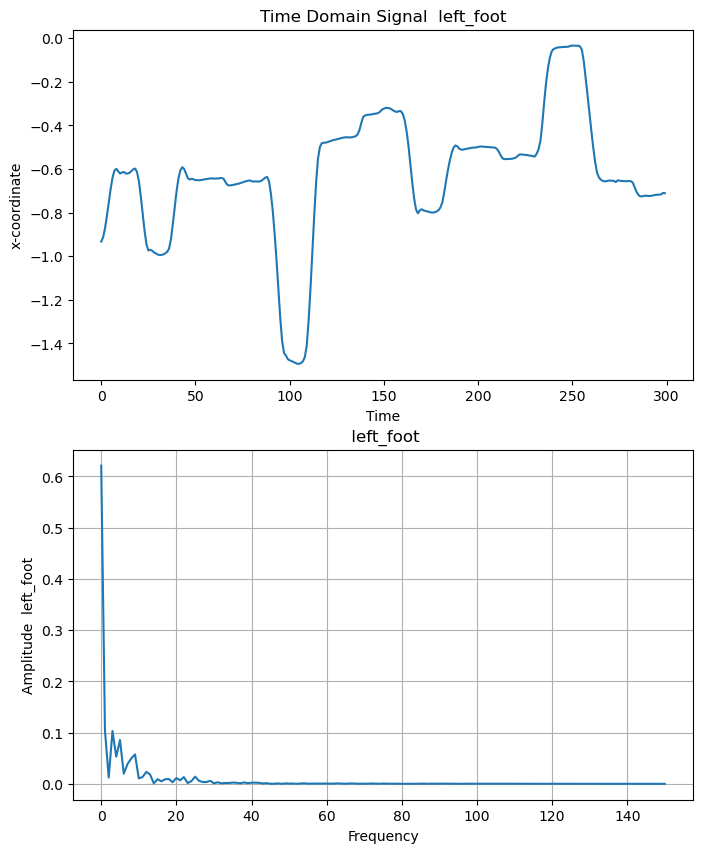

In [232]:
plot_freq_spectrum_update(data[-5], ' left_foot')

## Right Foot

In [233]:
index = joint_names.index('left_foot')

In [234]:
data = [data_point[:, index,0] for data_point in data_points]

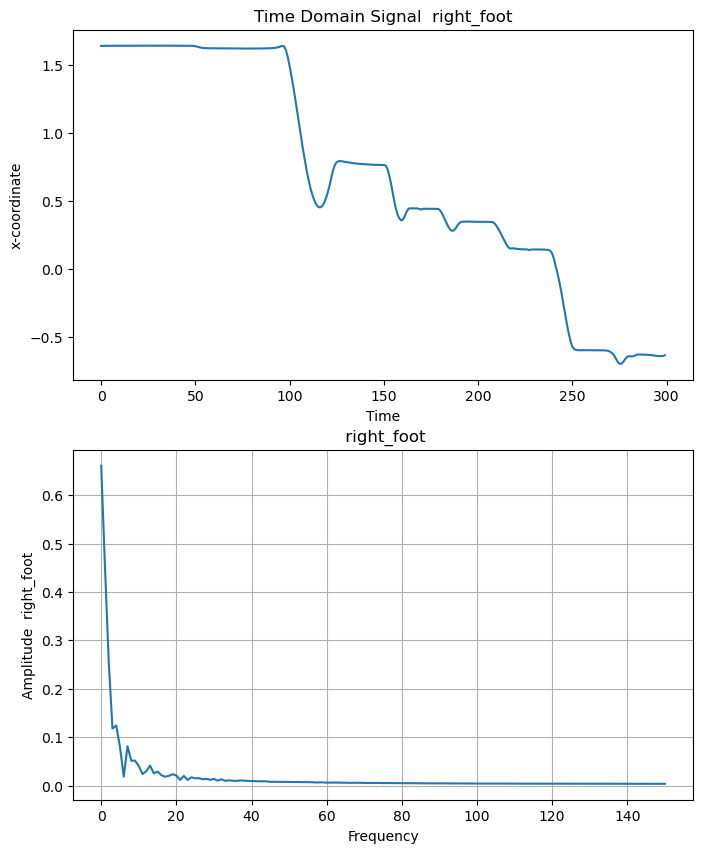

In [235]:
plot_freq_spectrum_update(data[10], ' right_foot')

(1024,)
(513,)


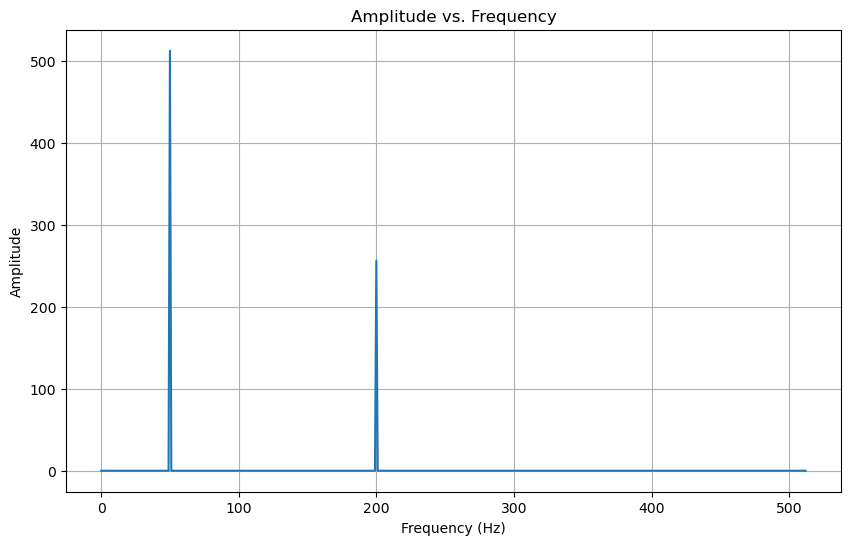

In [236]:
import numpy as np
import matplotlib.pyplot as plt

# Example signal parameters
T = 1024  # number of time points
t = np.linspace(0, 1, T, endpoint=False)  # time array

# Example signal
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)
print(x.shape)
# Compute the FFT using numpy.fft.rfft
fft_result = np.fft.rfft(x)
print(fft_result.shape)
# Calculate the amplitude
amplitude = np.abs(fft_result)

# Compute the frequency bins
freqs = np.fft.rfftfreq(T, d=t[1] - t[0])

# Plot the amplitude vs. frequency graph
plt.figure(figsize=(10, 6))
plt.plot(freqs, amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude vs. Frequency')
plt.grid()
plt.show()
